# Exploring Weather Trends
 
In this project, the temperature data in a local city where I live, Atlanta, GA, USA, and global data from 1750 through 2013 have been analyzed, and the local and world average annual temperature trends have been compared.


## Outline

1. Atlanta (ATL) and global datasets (World) were extracted using SQL and exported to CSV. The following are the scripts written to extract Atlanta and global temperature datasets, respectively.

    - `select * from city_data where city = 'Atlanta' and country = 'United States'`
    - `select * from global_data`


In [1]:
# import python module packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import extracted data sets
world = pd.read_csv('results_world.csv')
atl = pd.read_csv('results_atlanta.csv')

In [3]:
world.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


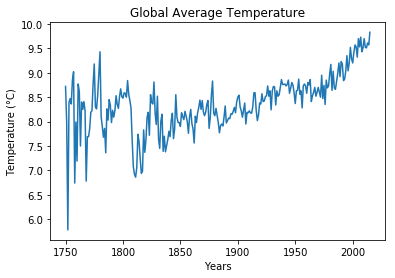

In [4]:
plt.plot(world.year, world.avg_temp)
plt.xlabel("Years")
plt.ylabel("Temperature (°C)")
plt.title("Global Average Temperature")
plt.show()

In [5]:
atl.head()

,year,city,country,avg_temp
0,1743,Atlanta,United States,8.13
1,1744,Atlanta,United States,15.86
2,1745,Atlanta,United States,8.13
3,1746,Atlanta,United States,NaN
4,1747,Atlanta,United States,NaN


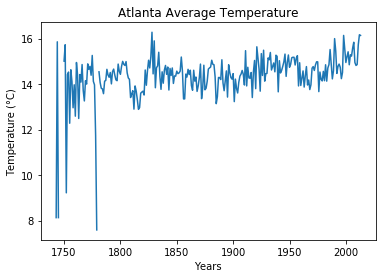

In [6]:
plt.plot(atl.year, atl.avg_temp)
plt.xlabel("Years")
plt.ylabel("Temperature (°C)")
plt.title("Atlanta Average Temperature")
plt.show()

2. The dataset of global temperature is available from 1750 through 2015 while ATL temperature is from 1743 through 2013. To compare them, I decided to have common years which are from 1750 to 2013. 

In [7]:
world[world.isnull().any(axis=1)]

,year,avg_temp


In [8]:
atl[atl.isnull().any(axis=1)]

,year,city,country,avg_temp
3,1746,Atlanta,United States,NaN
4,1747,Atlanta,United States,NaN
5,1748,Atlanta,United States,NaN
6,1749,Atlanta,United States,NaN
37,1780,Atlanta,United States,NaN


3. There was a missing temperature on ATL in 1780, but we are trying to figure out the trends based on moving average years, so we decided to keep the temperatures of ATL and World in 1780

In [9]:
def moving_avg(num, data_input):  
    data_input['average_'+str(num)] = data_input.avg_temp.rolling(window = num).mean()
    return data_input

4. The moving average of 5 years and 10 years respectively were calculated with `pandas.DataFrame.rolling` function which provides rolling window calculations. The moving average can be calculated by the sum of 5-year temperatures or 10-year temperatures over the count of years. For an example of the 5-year moving average temperature, the sum of temperatures of the year of 1750 through 1754 is divided by the count of years which is 5 in this case.


In [10]:
moving_avg(5,world);
moving_avg(5,atl);

In [11]:
world.head(10)

,year,avg_temp,average_5
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,7.868
5,1755,8.36,7.796
6,1756,8.85,7.970
7,1757,9.02,8.618
8,1758,6.74,8.288
9,1759,7.99,8.192


In [12]:
atl.head(10)

,year,city,country,avg_temp,average_5
0,1743,Atlanta,United States,8.13,NaN
1,1744,Atlanta,United States,15.86,NaN
2,1745,Atlanta,United States,8.13,NaN
3,1746,Atlanta,United States,NaN,NaN
4,1747,Atlanta,United States,NaN,NaN
5,1748,Atlanta,United States,NaN,NaN
6,1749,Atlanta,United States,NaN,NaN
7,1750,Atlanta,United States,15.01,NaN
8,1751,Atlanta,United States,15.73,NaN
9,1752,Atlanta,United States,9.22,NaN


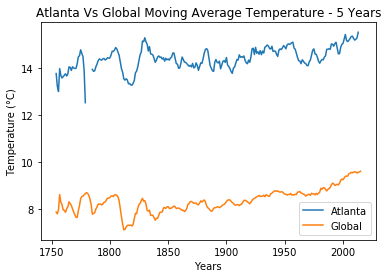

In [13]:
plt.plot(atl['year'], atl['average_5'], label='Atlanta')
plt.plot(world['year'], world['average_5'], label='Global')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Temperature (°C)")
plt.title("Atlanta Vs Global Moving Average Temperature - 5 Years")
plt.show()

5. For a better understanding, the key consideration for visualizing the trends on a plot shows that the trends over the years are in the x-axis and how much different temperatures are on the y-axis.  

In [14]:
moving_avg(10,world);
moving_avg(10,atl);

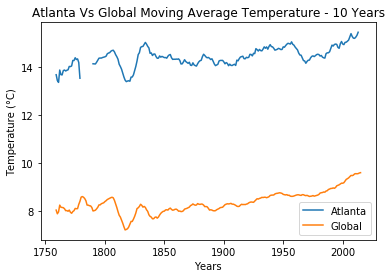

In [15]:
plt.plot(atl['year'], atl['average_10'], label='Atlanta')
plt.plot(world['year'], world['average_10'], label='Global')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Temperature (°C)")
plt.title("Atlanta Vs Global Moving Average Temperature - 10 Years")
plt.show()

In [16]:
df=pd.merge(atl, world, on='year', how='inner')
df.head()

,year,city,country,avg_temp_x,average_5_x,average_10_x,avg_temp_y,average_5_y,average_10_y
0,1750,Atlanta,United States,15.01,NaN,NaN,8.72,NaN,NaN
1,1751,Atlanta,United States,15.73,NaN,NaN,7.98,NaN,NaN
2,1752,Atlanta,United States,9.22,NaN,NaN,5.78,NaN,NaN
3,1753,Atlanta,United States,14.42,NaN,NaN,8.39,NaN,NaN
4,1754,Atlanta,United States,14.53,13.782,NaN,8.47,7.868,NaN


In [17]:
df['diff'] = df.avg_temp_x - df.avg_temp_y
df['diff_5'] = df.average_5_x - df.average_5_y
df['diff_10'] = df.average_10_x - df.average_10_y

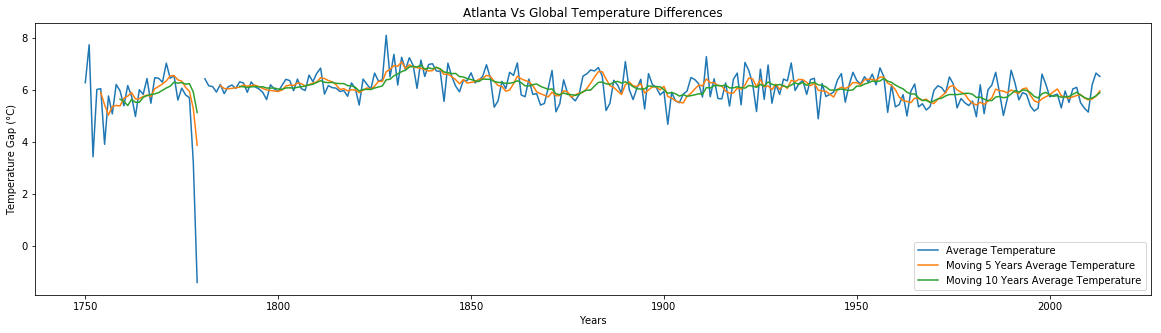

In [18]:
plt.figure(figsize=(20,5))
plt.plot(df['year'], df['diff'], label='Average Temperature')
plt.plot(df['year'], df['diff_5'], label='Moving 5 Years Average Temperature')
plt.plot(df['year'], df['diff_10'], label='Moving 10 Years Average Temperature')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Temperature Gap (°C)")
plt.title("Atlanta Vs Global Temperature Differences")
plt.show()

## Observations
- City of Atlanta in USA is hotter on average compared to the global average every year over the whole analyzed period. (5-year moving average and 10-year moving average charts)
- The difference has been consistent over time except for the period of 1779-1783 when the difference is less than 5.
- The average temperatures in ATL and World have fluctuated over the years. 
- ATL and World have an increasing trend in temperature over the period.
- The 10-year moving average has a more smooth line over the period compared to the 5-year moving average. 
